# The vector structure of probability spaces

Based on:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2423493/

How to add two probabilities? Does it even make sense?

Let $\Delta_{K}$ be the $K+1$-dimensional probability simplex,

$$\Delta_K := \left\{ p \in [0,1]^{K+1}: \sum_{k=1}^{K+1} p_k = 1 \right\}$$

Define the **logit function** as the map $\phi: \Delta_K \to \mathbb R^{K}$ such that, if $p_i$ is the $i$-th component of $p$, then

$$\boxed{\phi(p)_i = \log \frac{p_i}{p_{K+1}}}\quad\mbox{(logit function)}$$

where the last component $p_{K+1}$ is equal to $1 - \sum_{k=1}^K p_k$.

Similarly, we can compute its inverse as

$$\phi^{-1}(x)_i = \begin{cases}
\displaystyle \frac{e^{x_i}}{Z} & \mbox{ if } i \in \{1,\cdots,K\}\\
\displaystyle \frac{1}{Z} & \mbox{ if } i = K+1
\end{cases}$$

where the normalization is

$$Z = 1 + \sum_{k=1}^K e^{x_k}$$

We *define* the sum of two points in the simplex as

$$\boxed{|p\rangle + |q\rangle := \phi^{-1}(\phi(p) + \phi(q))}$$

and the multiplication by scalar $\cdot$ as

$$\boxed{\alpha |p\rangle := \phi^{-1}(\alpha\, \phi(p))}$$

It is easy to show that these two yield

$$\boxed{|p\rangle+|q\rangle = \frac{1}{ \sum_{k=1}^{K+1} p_k q_k} \sum_i p_i q_i |i\rangle}$$

$$\boxed{\alpha | p\rangle = \frac{1}{\sum_{k=1}^{K+1} p_k^\alpha} \sum_i p_i^\alpha |i\rangle}$$

Some important results:
    
* The **null vector** in $\Delta_K$ is the one relative to the uniform distribution:
  $$|0\rangle= \sum_{i=1}^{K+1} \frac{1}{K+1} |i\rangle $$
  
  It is easy to show that $|p\rangle + | 0\rangle = |p\rangle$ for any $p$.
  
* The **additive inverse**, which we call $|- p\rangle$, is exactly $(-1)| p\rangle$:
  
  $$|- p\rangle_i = (-1 |p\rangle)_i = \frac{1/p_i}{\sum_{k=1}^{K+1} 1/p_k}$$

With these operations, $(\Delta_K, +, \cdot)$ is a real vector space!

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [94]:
from __future__ import annotations

class Prob:
    
    def __init__(self, 
                coords: np.array):
        
        self.p = np.array(coords)
    
    def __add__(self, q: Prob):
        summ = self.p * q.p
        summ /= summ.sum()
        
        return Prob(coords=summ)
    
    def __sub__(self, q: Prob):
        return self.__add__(q.scalar(-1))
    
    def __mul__(self, a: float):
        
        return self.scalar(a)
    
    def scalar(self, a: float):
        
        coords = (self.p)**a
        coords /= coords.sum()
        return Prob(coords=coords)
    
    def __repr__(self):
        return "("+ ", ".join([str(round(p,4)) for p in self.p]) + ")"
    
    @classmethod
    def zero(clf):
        return Prob(1/3*np.ones((3)))

In [95]:
z = Prob.zero()

In [96]:
p = Prob([0.3, 0.3, 0.4])
q = Prob([0.2, 0.1, 0.7])

zero = Prob.zero()
zero

(0.3333, 0.3333, 0.3333)

In [97]:
p+zero # zero doesn't do anything

(0.3, 0.3, 0.4)

In [98]:
p_bar = p * (-1) # how does the additive inverse look like?
p_bar

(0.3636, 0.3636, 0.2727)

In [93]:
p+p_bar # should give the zero vector

(0.3333, 0.3333, 0.3333)

In [110]:
def plot_simplex(probs_list, ax=None):
    
    simplex_coords = lambda x, y, z:  ((-x+y)/np.sqrt(2), (-x-y+2*z+1)/np.sqrt(6))
    
    coords = np.array([simplex_coords(*p.p) for p in probs_list])
    xs, ys = coords[:,0], coords[:,1]
    
    if ax is None:
        plt.plot(xs, ys, alpha=0.9)
        plt.show()
    else:
        ax.plot(xs, ys, alpha=0.9)

In [116]:
w.p.sum()

1.04

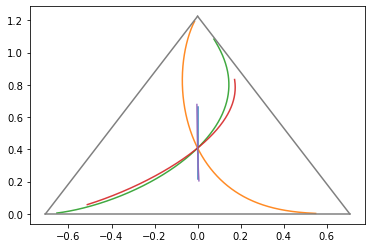

In [122]:
fig, ax = plt.subplots()
p_list = [p * a for a in np.arange(-3, 3, 0.01)]
plot_simplex(p_list, ax=ax)
    
q_list = [q * a for a in np.arange(-3, 3, 0.01)]
plot_simplex(q_list, ax=ax)

w = Prob([0.1, 0.3, 0.6])
w_list = [w * a for a in np.arange(-3,3, 0.01)]
plot_simplex(w_list, ax=ax)

w = Prob([0.18, 0.35, 0.47])
w_list = [w * a for a in np.arange(-3,3, 0.01)]
plot_simplex(w_list, ax=ax)

w = p+q*0.01
w_list = [w * a for a in np.arange(-3,3, 0.01)]
plot_simplex(w_list, ax=ax)



ax.plot([-1/np.sqrt(2), 0], [0, np.sqrt(3/2)], color='gray')
ax.plot([0, 1/np.sqrt(2) ], [np.sqrt(3/2), 0], color='gray')
ax.plot([-1/np.sqrt(2), 1/np.sqrt(2)], [0, 0], color='gray')

In [190]:
def plot_simplex(y_true, y_probs, ax=None):
    
    simplex_coords = lambda x, y, z:  ((-x+y)/np.sqrt(2), (-x-y+2*z+1)/np.sqrt(6))
    xs, ys = simplex_coords(y_probs[:,0], y_probs[:,1], y_probs[:,2])
    if ax is None:
        plt.plot(xs, ys, c=y_true, alpha=0.5, marker='.')
        plt.show()
    else:
        ax.plot(xs, ys, c=y_true, alpha=0.5, marker='.')

In [186]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X, y = make_classification(n_classes=3,
                           n_samples=3000,
                           random_state=2, 
                           n_features=10,
                           n_informative=10,
                           n_redundant=0,
                           n_repeated=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

model = RandomForestClassifier(random_state=3)
model.fit(X_train, y_train)

y_probs_rf = model.predict_proba(X_test)
y_probs_train_rf = model.predict_proba(X_train)


In [187]:
def logit2(p):
    p1, p2, p3 = p[0], p[1], p[2]
    
    return np.array([np.log(p1/p3), np.log(p2/p3)])

def inv_logit2(x):
    xx = np.append(x,0)
    Z = 1 + np.exp(x).sum()
    return 1/Z * np.exp(xx)

p = np.array([0.3, 0.1, 0.6])
assert np.all(inv_logit2(logit2(p)) == p)

In [188]:
def rot(theta):
    c, s = np.cos(theta), np.sin(theta)
    return np.array([[c, s],[-s,c]])

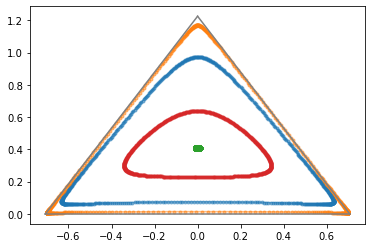

In [191]:
fig, ax = plt.subplots()

for p in [
    np.array([0.9, 0.05, 0.05]),
    np.array([0.99, 0.005, 0.005]),
    np.array([0.33, 0.33, 0.34]),
    np.array([0.6, 0.2, 0.2]),
#    np.array([0.2, 0.2, 0.6]),
#    np.array([0.2, 0.6, 0.2]),
]: 
    rotated_x = [rot(theta) @ logit2(p) for theta in np.arange(0, 6.28, 0.01)]
    rotate_p = [inv_logit2(xx) for xx in rotated_x]
    plot_simplex(None, np.array(rotate_p), ax)
    
ax.plot([-1/np.sqrt(2), 0], [0, np.sqrt(3/2)], color='gray')
ax.plot([0, 1/np.sqrt(2) ], [np.sqrt(3/2), 0], color='gray')
ax.plot([-1/np.sqrt(2), 1/np.sqrt(2)], [0, 0], color='gray')